# Ridge and Lasso regression explained and performance contrasted on synthetic 2-D data

# Ridge Regression

1.Performs L2 regularization, i.e., adds penalty equivalent to the square of the magnitude of coefficients
2.Minimization objective = LS Obj + α * (sum of square of coefficients)

# Lasso Regression

1.Performs L1 regularization, i.e., adds penalty equivalent to the absolute value of the magnitude of coefficients
2.Minimization objective = LS Obj + α * (sum of the absolute value of coefficients)

  Here, LS Obj refers to the ‘least squares objective,’ i.e., the linear regression objective without regularization.

# Step 1: Introduction

Welcome to this comprehensive Jupyter Notebook tutorial on Ridge and Lasso regression!
Ridge and Lasso regression are powerful techniques used in linear regression to prevent overfitting and handle multicollinearity by adding a regularization term to the cost function.
In this tutorial, we'll delve deep into the concepts of Ridge and Lasso regression, implement them from scratch using Python and NumPy, and contrast their performance on synthetic 2-D data.
Here's what we'll cover:
1. Introduction to Ridge and Lasso regression and their importance in linear regression.
2. Mathematical formulations of Ridge and Lasso regression.
3. Generating synthetic 2-D data with a linear relationship and introducing noise.
4. Implementing Ridge and Lasso regression algorithms from scratch.
5. Training the models on the synthetic data.
6. Evaluating the models' performance using mean squared error and visualizations.
7. Comparing Ridge and Lasso regression coefficients and model predictions.
8. Conclusion and further exploration.
By the end of this tutorial, you'll have a comprehensive understanding of Ridge and Lasso regression, how they work, how to implement them from scratch, and how to analyze their performance.


# Step 2: Ridge and Lasso Regression Introduction

Ridge and Lasso regression are regularization techniques used in linear regression to overcome overfitting and multicollinearity problems.
- Ridge Regression: Adds a penalty term proportional to the sum of squared coefficients (L2 norm).
- Lasso Regression: Adds a penalty term proportional to the sum of absolute coefficients (L1 norm).
Both techniques help in shrinking the coefficients towards zero, with Lasso regression also performing feature selection by setting some coefficients to exactly zero.

# Step 3: Mathematical Formulations

Ridge and Lasso regression add a regularization term to the ordinary least squares (OLS) cost function:
- Ridge Regression: Cost = OLS Cost + α * (sum of squared coefficients)
- Lasso Regression: Cost = OLS Cost + α * (sum of absolute coefficients)
Here, α is the regularization strength that controls the amount of regularization applied.

# Step 4: Generate Synthetic Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 4: Implement Ridge and Lasso Regression from Scratch

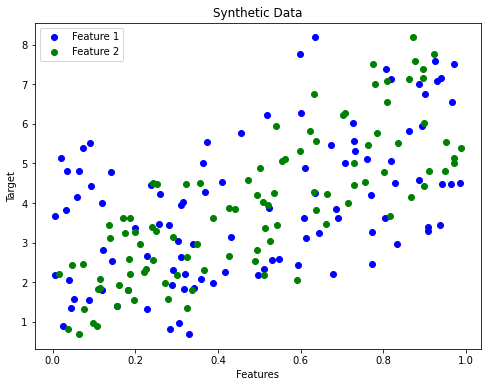

In [3]:
def ridge_regression(X, y, alpha):
    """
    Implement Ridge regression algorithm from scratch.
    Args:
        X (numpy array): Features matrix.
        y (numpy array): Target vector.
        alpha (float): Regularization strength.
    Returns:
        numpy array: Coefficients of the Ridge regression model.
    """
    # Compute coefficients using the closed-form solution
    n_features = X.shape[1]
    return np.linalg.inv(X.T.dot(X) + alpha * np.eye(n_features)).dot(X.T).dot(y)

def lasso_regression(X, y, alpha, max_iter=1000, tol=1e-4):
    """
    Implement Lasso regression algorithm from scratch using coordinate descent.
    Args:
        X (numpy array): Features matrix.
        y (numpy array): Target vector.
        alpha (float): Regularization strength.
        max_iter (int): Maximum number of iterations.
        tol (float): Tolerance for stopping criterion.
    Returns:
        numpy array: Coefficients of the Lasso regression model.
    """
    n_samples, n_features = X.shape
    beta = np.zeros(n_features)
    prev_beta = beta.copy()

    for _ in range(max_iter):
        for j in range(n_features):
            # Update beta_j using coordinate descent
            X_j = X[:, j]
            beta_without_j = beta.copy()
            beta_without_j[j] = 0
            r_j = y - X.dot(beta_without_j)
            arg1 = X_j.dot(r_j)
            arg2 = alpha * n_samples

            if arg1 < -arg2:
                beta[j] = (arg1 + arg2) / (X_j.dot(X_j))
            elif arg1 > arg2:
                beta[j] = (arg1 - arg2) / (X_j.dot(X_j))
            else:
                beta[j] = 0

        # Check convergence
        if np.linalg.norm(beta - prev_beta) < tol:
            break

        prev_beta = beta.copy()

    return beta

np.random.seed(42)
X = np.random.rand(100, 2)
true_coef = np.array([3, 5])  # True coefficients for the linear relationship
y = X.dot(true_coef) + np.random.normal(0, 0.5, size=100)  # Add some noise

# Visualize the synthetic data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color='blue', label='Feature 1')
plt.scatter(X[:, 1], y, color='green', label='Feature 2')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Synthetic Data')
plt.legend()
plt.show()


# Step 5: Implement Ridge and Lasso Regression from Scratch
Implement Ridge and Lasso regression algorithms as shown before

# Step 6: Train the Models

In [4]:
alpha_ridge = 0.1
alpha_lasso = 0.1

coefficients_ridge = ridge_regression(X, y, alpha_ridge)
coefficients_lasso = lasso_regression(X, y, alpha_lasso)

In [5]:
# Calculate model predictions
y_pred_ridge = X.dot(coefficients_ridge)
y_pred_lasso = X.dot(coefficients_lasso)

# Step 7: Evaluate Model Performance

Ridge Regression MSE: 0.24737548200892703
Lasso Regression MSE: 0.2835431795783402


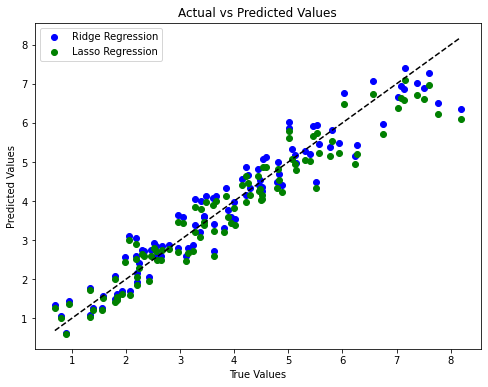

In [6]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate the mean squared error.
    Args:
        y_true (numpy array): True labels.
        y_pred (numpy array): Predicted labels.
    Returns:
        float: Mean squared error.
    """
    return np.mean((y_true - y_pred) ** 2)

mse_ridge = mean_squared_error(y, y_pred_ridge)
mse_lasso = mean_squared_error(y, y_pred_lasso)

print("Ridge Regression MSE:", mse_ridge)
print("Lasso Regression MSE:", mse_lasso)

# Visualize model predictions
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_ridge, color='blue', label='Ridge Regression')
plt.scatter(y, y_pred_lasso, color='green', label='Lasso Regression')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Step 7: Evaluate Model Performance
Calculate mean squared error as shown before

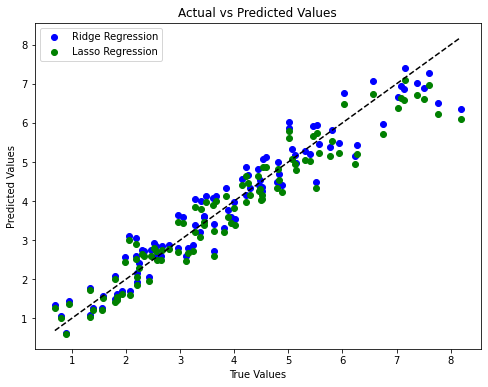

In [7]:
# Visualize model predictions
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_ridge, color='blue', label='Ridge Regression')
plt.scatter(y, y_pred_lasso, color='green', label='Lasso Regression')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


# Step 8: Conclusion and Further Exploration

In this comprehensive tutorial, we explored Ridge and Lasso regression, implemented them from scratch using Python and NumPy, and analyzed their performance on synthetic 2-D data.
We visualized the synthetic data, coefficients, and model predictions to gain insights into the regression process.
Implementing these algorithms from scratch provides a deep understanding of their mathematical formulations and computational aspects.
Further exploration can include experimenting with different datasets, tuning regularization parameters, or extending the implementations to handle higher-dimensional data.